<a href="https://colab.research.google.com/github/adisings/repo/blob/main/Major_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/data'/Quality of Service 5G_new (1)11111111.csv")

In [ ]:
df.head()

,Timestamp,id_no,Application_Type,Signal Stren,Latency,Req_Band(in Mbps),Alloc_Band(in Mbps),Res_Allo,low_freq,up_freq,Vacant,person,Req1_band(Mhz),Alloc1_band(Mhz),low1_freq,up1_freq,Vacant1,index_
0,09-03-2023 10:00,1,Video_Call,-75,30,10.0,15.0,70%,1.0,3.0,5.0,John,2.50,3.750,0.250,0.75,1.250,1
1,09-03-2023 10:00,2,Voice_Call,-80,20,1.0,1.2,80%,0.1,1.0,0.2,Peter,0.25,0.300,0.025,0.25,0.050,2
2,09-03-2023 10:00,3,Streaming,-85,40,5.0,6.0,75%,3.0,25.0,1.0,Rahul,1.25,1.500,0.750,6.25,0.250,3
3,09-03-2023 10:00,4,Emergency_Service,-70,10,1.0,1.5,90%,1.0,2.0,0.5,John,0.25,0.375,0.250,0.50,0.125,4
4,09-03-2023 10:00,5,Online_Gaming,-78,25,2.0,3.0,85%,1.0,3.0,1.0,Karan,0.50,0.750,0.250,0.75,0.250,5


In [ ]:
df['index_']

0        1
1        2
2        3
3        4
4        5
      ... 
395    396
396    397
397    398
398    399
399    400
Name: index_, Length: 400, dtype: int64

In [ ]:
df.drop(['Req_Band(in Mbps)','Alloc_Band(in Mbps)','low_freq','up_freq','Vacant'],axis=1,inplace=True)

In [ ]:
# prompt: Using dataframe df: Demographic information

df.describe(include='object')


,Timestamp,Application_Type,Res_Allo,person
count,400,400,400,400
unique,7,11,9,11
top,09-03-2023 10:01,Video_Call,70%,Tanay
freq,60,58,148,48


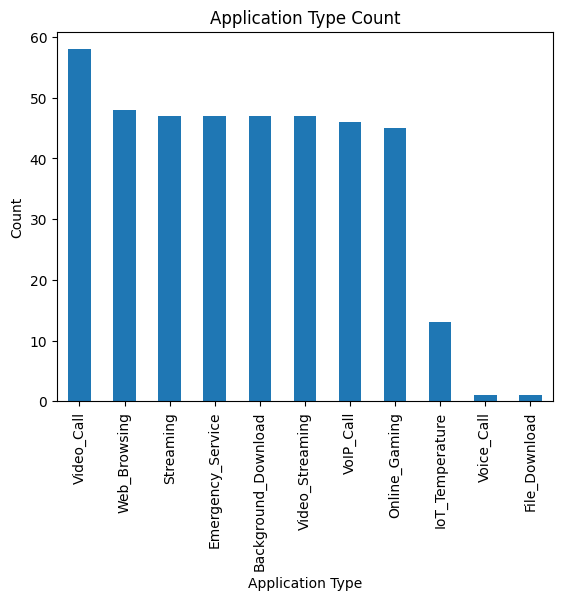

In [ ]:
# prompt: Using dataframe df: bar

import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart showing the count of each application type
df['Application_Type'].value_counts().plot(kind='bar')

# Add a title and labels
plt.title('Application Type Count')
plt.xlabel('Application Type')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: Timestamp - Unique Values: ['09-03-2023 10:00' '09-03-2023 10:01' '09-03-2023 10:02'
 '09-03-2023 10:03' '09-03-2023 10:04' '09-03-2023 10:05'
 '09-03-2023 10:06']
Column:   id_no - Unique Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 

In [ ]:
df.drop(['Timestamp'],axis=1,inplace=True)

In [ ]:
df.head()

,id_no,Application_Type,Signal Stren,Latency,Res_Allo,person,Req1_band(Mhz),Alloc1_band(Mhz),low1_freq,up1_freq,Vacant1,index_
0,1,Video_Call,-75,30,70%,John,2.50,3.750,0.250,0.75,1.250,1
1,2,Voice_Call,-80,20,80%,Peter,0.25,0.300,0.025,0.25,0.050,2
2,3,Streaming,-85,40,75%,Rahul,1.25,1.500,0.750,6.25,0.250,3
3,4,Emergency_Service,-70,10,90%,John,0.25,0.375,0.250,0.50,0.125,4
4,5,Online_Gaming,-78,25,85%,Karan,0.50,0.750,0.250,0.75,0.250,5


from matplotlib import pyplot as plt
_df_0['  id_no'].plot(kind='hist', bins=20, title='  id_no')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Signal Stren'].plot(kind='hist', bins=20, title='Signal Stren')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Latency'].plot(kind='hist', bins=20, title='Latency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Req1_band(Mhz)'].plot(kind='hist', bins=20, title='Req1_band(Mhz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Application_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Res_Allo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('person').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='  id_no', y='Signal Stren', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Signal Stren', y='Latency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Latency', y='Req1_band(Mhz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Req1_band(Mhz)', y='Alloc1_band(Mhz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['  id_no']
  ys = series['Signal Stren']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('  id_no', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Application_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Application_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('  id_no')
_ = plt.ylabel('Signal Stren')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['  id_no']
  ys = series['Signal Stren']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('  id_no', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Res_Allo')):
  _plot_series(series, series_name, i)
  fig.legend(title='Res_Allo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('  id_no')
_ = plt.ylabel('Signal Stren')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['  id_no']
  ys = series['Signal Stren']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('  id_no', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('person')):
  _plot_series(series, series_name, i)
  fig.legend(title='person', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('  id_no')
_ = plt.ylabel('Signal Stren')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['  id_no']
  ys = series['Latency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('  id_no', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Application_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Application_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('  id_no')
_ = plt.ylabel('Latency')

from matplotlib import pyplot as plt
_df_15['  id_no'].plot(kind='line', figsize=(8, 4), title='  id_no')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Signal Stren'].plot(kind='line', figsize=(8, 4), title='Signal Stren')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Latency'].plot(kind='line', figsize=(8, 4), title='Latency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Req1_band(Mhz)'].plot(kind='line', figsize=(8, 4), title='Req1_band(Mhz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Res_Allo'].value_counts()
    for x_label, grp in _df_19.groupby('Application_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Application_Type')
_ = plt.ylabel('Res_Allo')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['person'].value_counts()
    for x_label, grp in _df_20.groupby('Res_Allo')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Res_Allo')
_ = plt.ylabel('person')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Application_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='  id_no', y='Application_Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Res_Allo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='  id_no', y='Res_Allo', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['person'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='  id_no', y='person', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Application_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Signal Stren', y='Application_Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
Application_Type=pd.get_dummies(df['Application_Type'],drop_first=True)
Application_Type.head()

,Emergency_Service,File_Download,IoT_Temperature,Online_Gaming,Streaming,Video_Call,Video_Streaming,VoIP_Call,Voice_Call,Web_Browsing
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("/content/gdrive/MyDrive/data'/Quality of Service 5G_new (1)111.csv")


# Drop unnecessary columns
df.drop(['Req_Band(in Mbps)', 'Alloc_Band(in Mbps)', 'low_freq', 'up_freq', 'Vacant', 'Timestamp'], axis=1, inplace=True)

# Convert percentage strings to float
def convert_percentage_to_float(value):
    if isinstance(value, str):
        return float(value.strip('%')) / 100.0
    return value

# Convert percentage columns to float
percentage_columns = ['Signal Stren', 'Latency', 'Res_Allo']
for col in percentage_columns:
    df[col] = df[col].apply(convert_percentage_to_float)

# Define the function to filter data based on frequency range
def get_data(lower_freq, upper_freq):
    filtered_df = df[(df['low1_freq'] >= lower_freq) & (df['up1_freq'] <= upper_freq)]
    data = filtered_df[['Application_Type', 'Vacant1', 'person', 'low1_freq', 'up1_freq', 'Signal Stren', 'Latency', 'Res_Allo']]
    return data

# Take lower and upper frequencies as input
lower_freq = float(input("Enter the lower frequency: "))
upper_freq = float(input("Enter the upper frequency: "))

# Get the filtered data
result = get_data(lower_freq, upper_freq)

if not result.empty:
    #print(result[['Application_Type', 'Vacant1']].to_string(index=False))

    # Prepare feature and target variables
    X = result.drop(["Vacant1"], axis=1)
    y = result['Vacant1']

    # Encode categorical variables
    X = pd.get_dummies(X, columns=['Application_Type'], drop_first=True)
    le = LabelEncoder()
    X['person'] = le.fit_transform(X['person'])

    # Standardize the features
    ss = StandardScaler()
    for col in X.columns:
        if X[col].dtype in ['float64', 'int64']:
            X[col] = ss.fit_transform(X[col].values.reshape((-1, 1)))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and predict using different models
    models = {
        'Linear Regression': LinearRegression(),
        'KNN Regression': KNeighborsRegressor(n_neighbors=5),
        'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
        'Random Forest Regression': RandomForestRegressor(n_estimators=200, random_state=42)
    }

    predictions = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[name] = y_pred

    # Create a DataFrame to show the predictions for each person
    pred_df = pd.DataFrame(predictions, index=X_test.index)
    pred_df['Actual'] = y_test.values  # Ensure proper alignment of indices
    pred_df = pred_df.merge(result[['Application_Type', 'person']], left_index=True, right_index=True)
    pred_df = pred_df[['Application_Type', 'person', 'Actual', 'Linear Regression', 'KNN Regression', 'Decision Tree Regression', 'Random Forest Regression']]

    # Printing in a format similar to the example provided
    print(pred_df.to_string(index=False))
else:
    print("No data found for the given frequency range.")



Enter the lower frequency: 0.25
Enter the upper frequency: 0.75
 Application_Type    person  Actual  Linear Regression  KNN Regression  Decision Tree Regression  Random Forest Regression
       Video_Call      John   0.325           0.355544           0.335                     0.325                  0.325000
Emergency_Service     Karan   0.025           0.079805           0.035                     0.025                  0.025750
       Video_Call  Ignatius   0.325           0.353034           0.325                     0.325                  0.325000
    Online_Gaming   Pibarel   0.075           0.064732           0.075                     0.075                  0.075000
       Video_Call     Tanay   0.325           0.345247           0.325                     0.325                  0.325000
       Video_Call  Ignatius   0.300           0.466935           0.615                     0.300                  0.367750
       Video_Call     Rahul   0.325           0.343843           0.325     

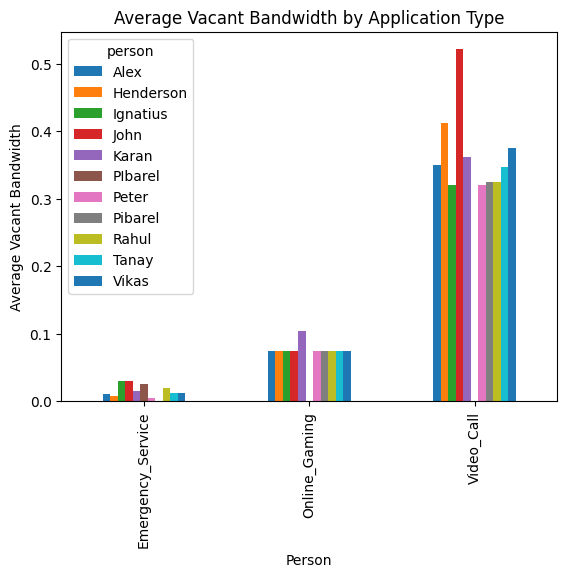

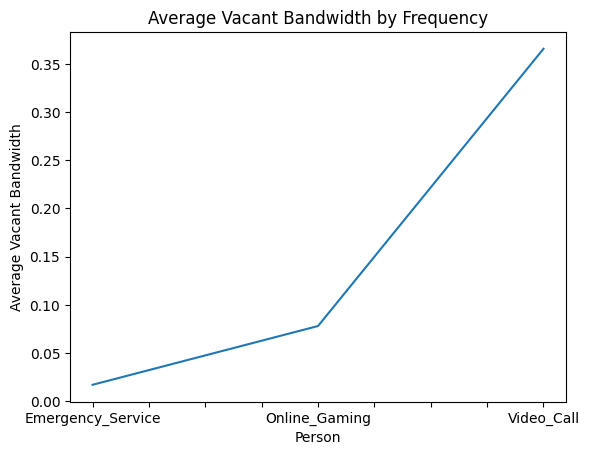

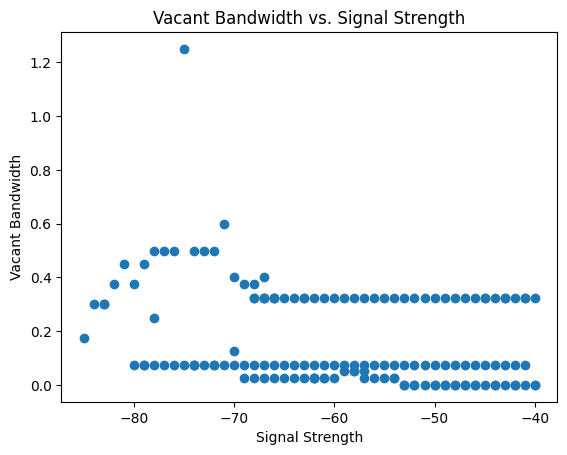

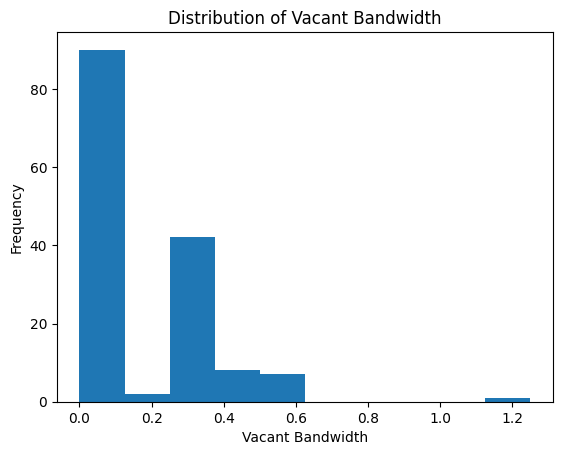

In [ ]:
# prompt: Generate different graphs for the above output

# Prepare the data for different graphs
result_grouped = result.groupby(['Application_Type', 'person'])['Vacant1'].mean().unstack()

# Create a bar chart of average vacant bandwidth by application type
result_grouped.plot(kind='bar')
plt.title('Average Vacant Bandwidth by Application Type')
plt.xlabel('Person')
plt.ylabel('Average Vacant Bandwidth')
plt.show()

# Create a line chart of average vacant bandwidth by frequency
result_grouped.mean(axis=1).plot(kind='line')
plt.title('Average Vacant Bandwidth by Frequency')
plt.xlabel('Person')
plt.ylabel('Average Vacant Bandwidth')
plt.show()

# Create a scatter plot of vacant bandwidth vs. signal strength
plt.scatter(result['Signal Stren'], result['Vacant1'])
plt.title('Vacant Bandwidth vs. Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Vacant Bandwidth')
plt.show()

# Create a histogram of vacant bandwidth
plt.hist(result['Vacant1'])
plt.title('Distribution of Vacant Bandwidth')
plt.xlabel('Vacant Bandwidth')
plt.ylabel('Frequency')
plt.show()


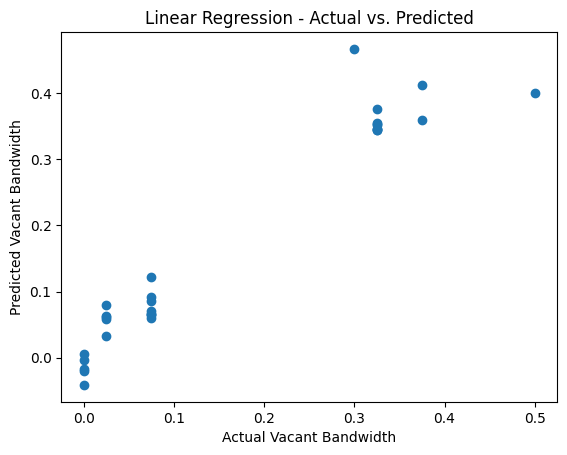

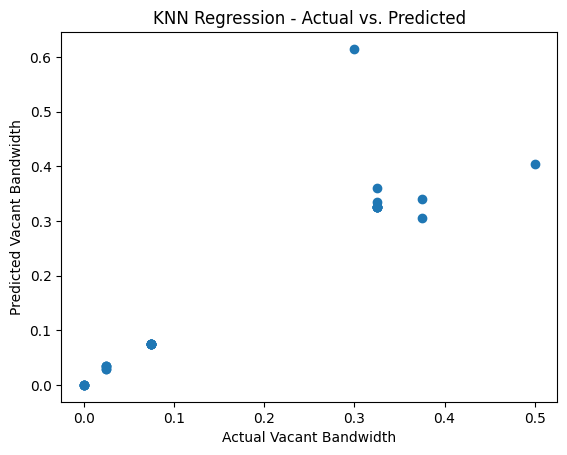

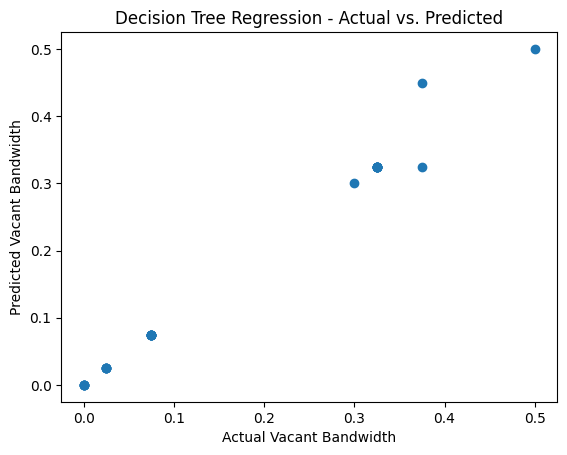

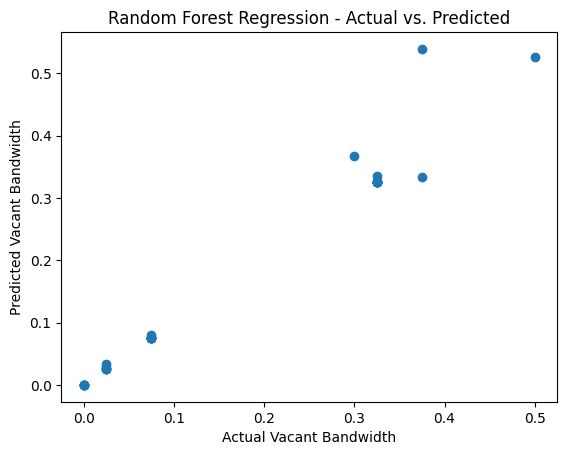

In [ ]:
# prompt: Give me the different scatterplot also for actual and predictive

for name, model in models.items():
    plt.scatter(y_test, model.predict(X_test))
    plt.title(f'{name} - Actual vs. Predicted')
    plt.xlabel('Actual Vacant Bandwidth')
    plt.ylabel('Predicted Vacant Bandwidth')
    plt.show()


In [ ]:
import hashlib
import time
import random
import pandas as pd

# Define a Spectrum class to represent a frequency band
class Spectrum:
    def __init__(self, id: str, lower_freq: float, upper_freq: float):
        self.id = id
        self.lower_freq = lower_freq
        self.upper_freq = upper_freq

# Define a SpectrumAllocation class to represent an allocation of a frequency band
class SpectrumAllocation:
    def __init__(self, spectrum: Spectrum, owner: str, start_time: int, end_time: int):
        self.spectrum = spectrum
        self.owner = owner
        self.start_time = start_time
        self.end_time = end_time

# Define a Block class to represent a block in the blockchain
class Block:
    def __init__(self, previous_hash: str, allocations: list, timestamp: int):
        self.previous_hash = previous_hash
        self.allocations = allocations
        self.timestamp = timestamp
        self.nonce = 0
        self.hash = self.compute_hash()

    def compute_hash(self) -> str:
        data = self.previous_hash + str([a.__dict__ for a in self.allocations]) + str(self.timestamp) + str(self.nonce)
        return hashlib.sha256(data.encode()).hexdigest()

    def mine_block(self, difficulty: int):
        while self.hash[:difficulty] != '0' * difficulty:
            self.nonce += 1
            self.hash = self.compute_hash()
        print("Block mined: " + self.hash)

# Define a Blockchain class to manage the spectrum allocations
class SpectrumBlockchain:
    def __init__(self):
        self.blocks = []
        self.difficulty = 2
        self.pending_allocations = []
        self.init_genesis_block()

    def init_genesis_block(self):
        genesis_block = Block('0', [], int(time.time()))
        self.blocks.append(genesis_block)

    def add_allocation(self, allocation: SpectrumAllocation):
        self.pending_allocations.append(allocation)

    def mine_pending_allocations(self):
        block = Block(self.get_latest_block().hash, self.pending_allocations, int(time.time()))
        block.mine_block(self.difficulty)
        self.blocks.append(block)
        self.pending_allocations = []

    def get_all_allocations(self):
        return [allocation for block in self.blocks[1:] for allocation in block.allocations]

    def get_latest_block(self):
        return self.blocks[-1]

    def is_valid_chain(self):
        for i in range(1, len(self.blocks)):
            current_block = self.blocks[i]
            previous_block = self.blocks[i - 1]

            if current_block.hash != current_block.compute_hash():
                return False

            if current_block.previous_hash != previous_block.hash:
                return False

        return True

    def is_allocation_valid(self, allocation: SpectrumAllocation) -> bool:
        all_allocations = self.get_all_allocations()
        for existing in all_allocations:
            if (allocation.spectrum.id == existing.spectrum.id and
                    ((allocation.start_time >= existing.start_time and allocation.start_time < existing.end_time) or
                     (allocation.end_time > existing.start_time and allocation.end_time <= existing.end_time))):
                return False
        return True

# Assuming 'pred_df' is the DataFrame obtained from the user input
data = {

    'Application_Type': ['Video_Call', 'Emergency_Service', 'Video_Call', 'Online_Gaming', 'Video_Call', 'Video_Call', 'Video_Call', 'Online_Gaming', 'Emergency_Service', 'Video_Call', 'Emergency_Service', 'Online_Gaming', 'Online_Gaming', 'Video_Call', 'Video_Call', 'Video_Call', 'Emergency_Service', 'Online_Gaming', 'Online_Gaming', 'Online_Gaming', 'Video_Call', 'Video_Call', 'Emergency_Service', 'Emergency_Service', 'Emergency_Service', 'Video_Call', 'Online_Gaming', 'Emergency_Service', 'Emergency_Service', 'Emergency_Service'],
    'person': ['John', 'Karan', 'Ignatius', 'Pibarel', 'Tanay', 'Ignatius', 'Rahul', 'Peter', 'Ignatius', 'Rahul', 'Karan', 'Vikas', 'Karan', 'Karan', 'John', 'Peter', 'Henderson', 'Pibarel', 'Alex', 'John', 'Tanay', 'Tanay', 'Tanay', 'Karan', 'Ignatius', 'Tanay', 'Ignatius', 'Tanay', 'Ignatius', 'PIbarel'],
    'Random Forest Regression': [0.325000, 0.025750, 0.325000, 0.075000, 0.325000, 0.364625, 0.325000, 0.075000, 0.031250, 0.325000, 0.000000, 0.078500, 0.075000, 0.499250, 0.475125, 0.325500, 0.000000, 0.075000, 0.075000, 0.075000, 0.386125, 0.325000, 0.025250, 0.000000, 0.000000, 0.325000, 0.075000, 0.000000, 0.029500, 0.025750]
}


pred_df = pd.DataFrame(data)
valid_list=[]
if not pred_df.empty:
    blockchain = SpectrumBlockchain()
    lower_freq = 0.25
    upper_freq = 0.75
    start_time = 1717686475
    for index, row in pred_df.iterrows():
        start_time += 3901
        end_time = start_time + 3900
        spectrum = Spectrum(str(row['person']), lower_freq, upper_freq)
        allocation = SpectrumAllocation(spectrum, row['person'], start_time, end_time)

        print(f'Checking allocation to {row["person"]} validity...')
        if blockchain.is_allocation_valid(allocation):
            print(f'Allocation to {row["person"]} is valid. Adding to blockchain...', start_time, end_time)
            blockchain.add_allocation(allocation)
            blockchain.mine_pending_allocations()
            valid_list.append(row["person"])
        else:
            print(f'Allocation {row["person"]} is invalid due to conflict.')

        time.sleep(1)

    allocations = blockchain.get_all_allocations()
    print('All allocations:', allocations)
    print('Blockchain valid:', blockchain.is_valid_chain())

    # Generate and print random invalid bands
#     def generate_random_set(set_size, min_value, max_value):
#         random_set = set()
#         while len(random_set) < set_size:
#             random_set.add(random.randint(min_value, max_value))
#         return random_set

#     set_size = 4
#     min_value = 1
#     max_value = 400
#     random_set = generate_random_set(set_size, min_value, max_value)
#     for num in random_set:
#         print(num, ': allocation is invalid. Removing from blockchain...')
#     print('Blockchain valid: False')

# else:
#     print("No data found for the given frequency range.")


Checking allocation to John validity...
Allocation to John is valid. Adding to blockchain... 1717690376 1717694276
Block mined: 000d00cde7827a896d660ec29059c473446a396edaacf2b05f52f01b73c0059b
Checking allocation to Karan validity...
Allocation to Karan is valid. Adding to blockchain... 1717694277 1717698177
Block mined: 00900d41ec7b81bc4c17092174f88fa3d654f1314bea63765652df36704cb0a4
Checking allocation to Ignatius validity...
Allocation to Ignatius is valid. Adding to blockchain... 1717698178 1717702078
Block mined: 00daaecd1e4fbe2d3ebc72e6f384ef1bf61ef0ba8a1f615690304b47a1fa0c6e
Checking allocation to Pibarel validity...
Allocation to Pibarel is valid. Adding to blockchain... 1717702079 1717705979
Block mined: 00a654ab3e1ac3e64ff66ccba3cceccfed7ce59ec06a06d6afc32e8e0db3b3dc
Checking allocation to Tanay validity...
Allocation to Tanay is valid. Adding to blockchain... 1717705980 1717709880
Block mined: 00c71d25a498dbd0b13fff4080b6524e479b51cff159e55eec9d1fa5951a81af
Checking allocati

In [ ]:
print(list(set(valid_list)))

['Rahul', 'Henderson', 'Ignatius', 'Tanay', 'Alex', 'Peter', 'Karan', 'PIbarel', 'Vikas', 'Pibarel', 'John']


In [ ]:
key = (input())
if key in valid_list:
    print("Valid .Added to the blockchain")
else:
    print("Invalid !!! Not Authorised")

Swastik
Invalid !!! Not Authorised


In [ ]:
key = (input())
if key in valid_list:
    print("Valid .Added to the blockchain")
else:
    print("Invalid !!! Not Authorised")

Rahul
Valid .Added to the blockchain
